# Dataset Loading

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./cosmetics.csv')

# Preprocessing

In [67]:
# Define harmful chemicals list
harmful_list = ['paraben', 'phthalate', 'phenoxyethanol', 'dimethicone', 'bht']

# Function to count harmful chemicals in ingredients
def count_harmful(ingredients):
    ing_lower = ingredients.lower()
    return sum(ing_lower.count(h) for h in harmful_list)

# Apply counting
df['harmful_count'] = df['Ingredients'].apply(count_harmful)

# Scale scores to 0-10
max_count = df['harmful_count'].max()
df['harm_score'] = df['harmful_count'] / max_count * 10 if max_count > 0 else 0
df['harm_score'] = df['harm_score'].round(2)
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,harmful_count,harm_score
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0.0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1,1.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1,1.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,3,3.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,1,1.0
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,3,3.0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,0,0.0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,2,2.0


In [29]:
def preprocess_ingredients(ingredients):
    
    ingredients_list = ingredients.strip().lower().split(',')
    ingredients_list = [ingredient.strip() for ingredient in ingredients_list]
    return ingredients_list

ingredients_lists = df['Ingredients'].apply(preprocess_ingredients)

all_ingredients = []
for ingredients_list in ingredients_lists:
    all_ingredients += ingredients_list

harmful_ingredients = set()
non_harmful_ingredients = set()
for ingredient in all_ingredients:
    for harmful in harmful_list:
        if harmful in ingredient:
            harmful_ingredients.add(ingredient)
        else:
            non_harmful_ingredients.add(ingredient)


In [68]:
new_df = df[['Ingredients', 'harmful_count', 'harm_score']].copy()
new_df

,Ingredients,harmful_count,harm_score
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0.0
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1.0
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1.0
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",3,3.0
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...",5,5.0
...,...,...,...
1467,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1.0
1468,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",3,3.0
1469,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0.0
1470,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",2,2.0


In [69]:
import numpy as np

max_harmful_count = df['harmful_count'].max()
harmful_count_freq = df['harmful_count'].value_counts()
max_harmful_count_freq = harmful_count_freq.max()

for i in range(1, len(harmful_count_freq)):
    count, freq = harmful_count_freq.index[i], harmful_count_freq.iloc[i]
    
    # sample 10-15 non-harmful ingredients and corresponding `count` harmful ingredients
    # and repeat (`max_harmful_count_freq` - freq) times
    augment_dict = {'Ingredients': [],
                    'harmful_count': [],
                    'harm_score': []}
    
    for j in range(max_harmful_count_freq - freq):
        size = np.random.randint(10, 16)
        sampled_non_harmful_ingredients = np.random.choice(list(non_harmful_ingredients), size=size, replace=False).tolist()
        sampled_harmful_ingredients = np.random.choice(list(harmful_ingredients), size=count, replace=False).tolist()
    
        sampled_ingredients = sampled_non_harmful_ingredients + sampled_harmful_ingredients
        sampled_ingredients = ', '.join(sampled_ingredients)
        augment_dict['Ingredients'].append(sampled_ingredients)
        augment_dict['harmful_count'].append(count)
        augment_dict['harm_score'].append(float(count))
    
    augment_df = pd.DataFrame(augment_dict)
    new_df = pd.concat([new_df, augment_df])
    

In [32]:
from sklearn.model_selection import train_test_split

X = new_df['Ingredients']
y = new_df['harm_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# EDA

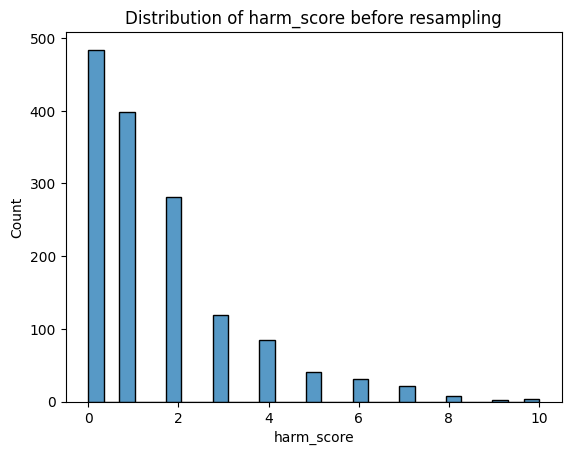

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x='harm_score')
plt.title('Distribution of harm_score before resampling')
plt.show()

# Linear regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train models
lr = LinearRegression()
lr.fit(X_train_vec, y_train)

# Predictions
y_pred_lg = lr.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred_lg)
mae = mean_absolute_error(y_test, y_pred_lg)
r2 = r2_score(y_test, y_pred_lg)

print('Linear regression: ')
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

Linear regression: 
MSE: 3.3577668233546065, MAE: 1.404626851936981, R2: 0.6624534844054941


# Decision tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dt = DecisionTreeRegressor()
dt.fit(X_train_vec, y_train)

y_pred_dt = dt.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print('Decision tree: ')
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

Decision tree: 
MSE: 2.3492957746478873, MAE: 0.9633802816901409, R2: 0.7638321406603692


# Random forest 

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_vec, y_train)

y_pred_rf = rf.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print('Random Forest: ')
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

Random Forest: 
MSE: 1.3060876995305164, MAE: 0.76, R2: 0.8687028089708387


# OCR

In [37]:
import easyocr

def process_text(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    
    # Remove ',' and ';' at the end of the text
    text = text.rstrip(',')
    text = text.rstrip(';')
    text.strip()
    
    return text

def raw2ingredients(raw_text):
    pattern = re.compile(
        r"ingredients[:\s]*(.*?)(?=\n[A-Z][a-z]+:|\Z)",
        re.IGNORECASE | re.DOTALL
    )

    match = pattern.search(raw_text)
    if not match:
        ingredients = raw_text
    else:
        ingredients = match.group(1)
        
    return ingredients


def img2ingredients(img_path):
    
    reader = easyocr.Reader(['en'])
    result = reader.readtext('sample1.png', detail = 0)
    raw_text = ', '.join([process_text(text) for text in result])
    ingredients = raw2ingredients(raw_text)
    return ingredients
    
test_ingredients = img2ingredients('sample1.png')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


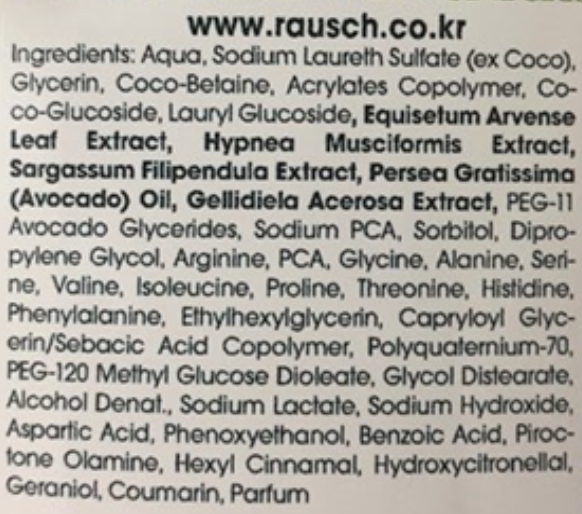

In [65]:
from PIL import Image
test_img = Image.open('sample1.png')
test_img

In [62]:
test_ingredients

'Aqua, Sodium Lauroth Sullate (ox Coco), Glcorin, Coco-Belaino, Acrylales Copolymer Co, co-Glucoside Lauryl Glucosido, Equiselum Arvense, Leal, Extract, Hypnea, Muscilormis, Extracl, Sargassum Filipendula Exlract; Persea Gralissima, (Avocado) Oil;, Gellidiela Acerosa Extracl; PEG-II, Avocado Glycendos;Sodium PCA, Sorbilol, pylene Glvcol, Arginine; PCA, Glycino. Alanine. Ser-, ne; Valine; Isoleucine, Prolilne, Threonine, Hislidine, Phenvlalanine, Ethylhexyiglycomn Capryloyl Glyc-, crin/sobackc Acid Copolymer; Polyqualernium-70, FEG-120 Mothyl Glucoso Dioloato, Glycol Disloarale, Aconol Denai , Sodium Lactate, Sodium Hydroxido, Asparlic Acid, Phenoxyethanol; Benzoic Acid; Airoc, Ione Olamine; Hexyl Cinnamal Hydroxycitronollal, Gcraniol Coumarin; Pailum, Dipro'

# Test

In [63]:
test_vec = vectorizer.transform(pd.Series(test_ingredients))
prediction = rf.predict(test_vec)
prediction

array([1.])